In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-flights-data-2008/2008.csv


> **1. CARGA DE DATASET "Flights data 2008"**

In [2]:
df = pd.read_csv("/kaggle/input/us-flights-data-2008/2008.csv")
df.shape

(7009728, 29)

> **2. LECTURA DE DATASET "Flights data 2008"**

In [3]:
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,3.0,7.0,0,NaN,0,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,7.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,6.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,3.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

<Axes: >

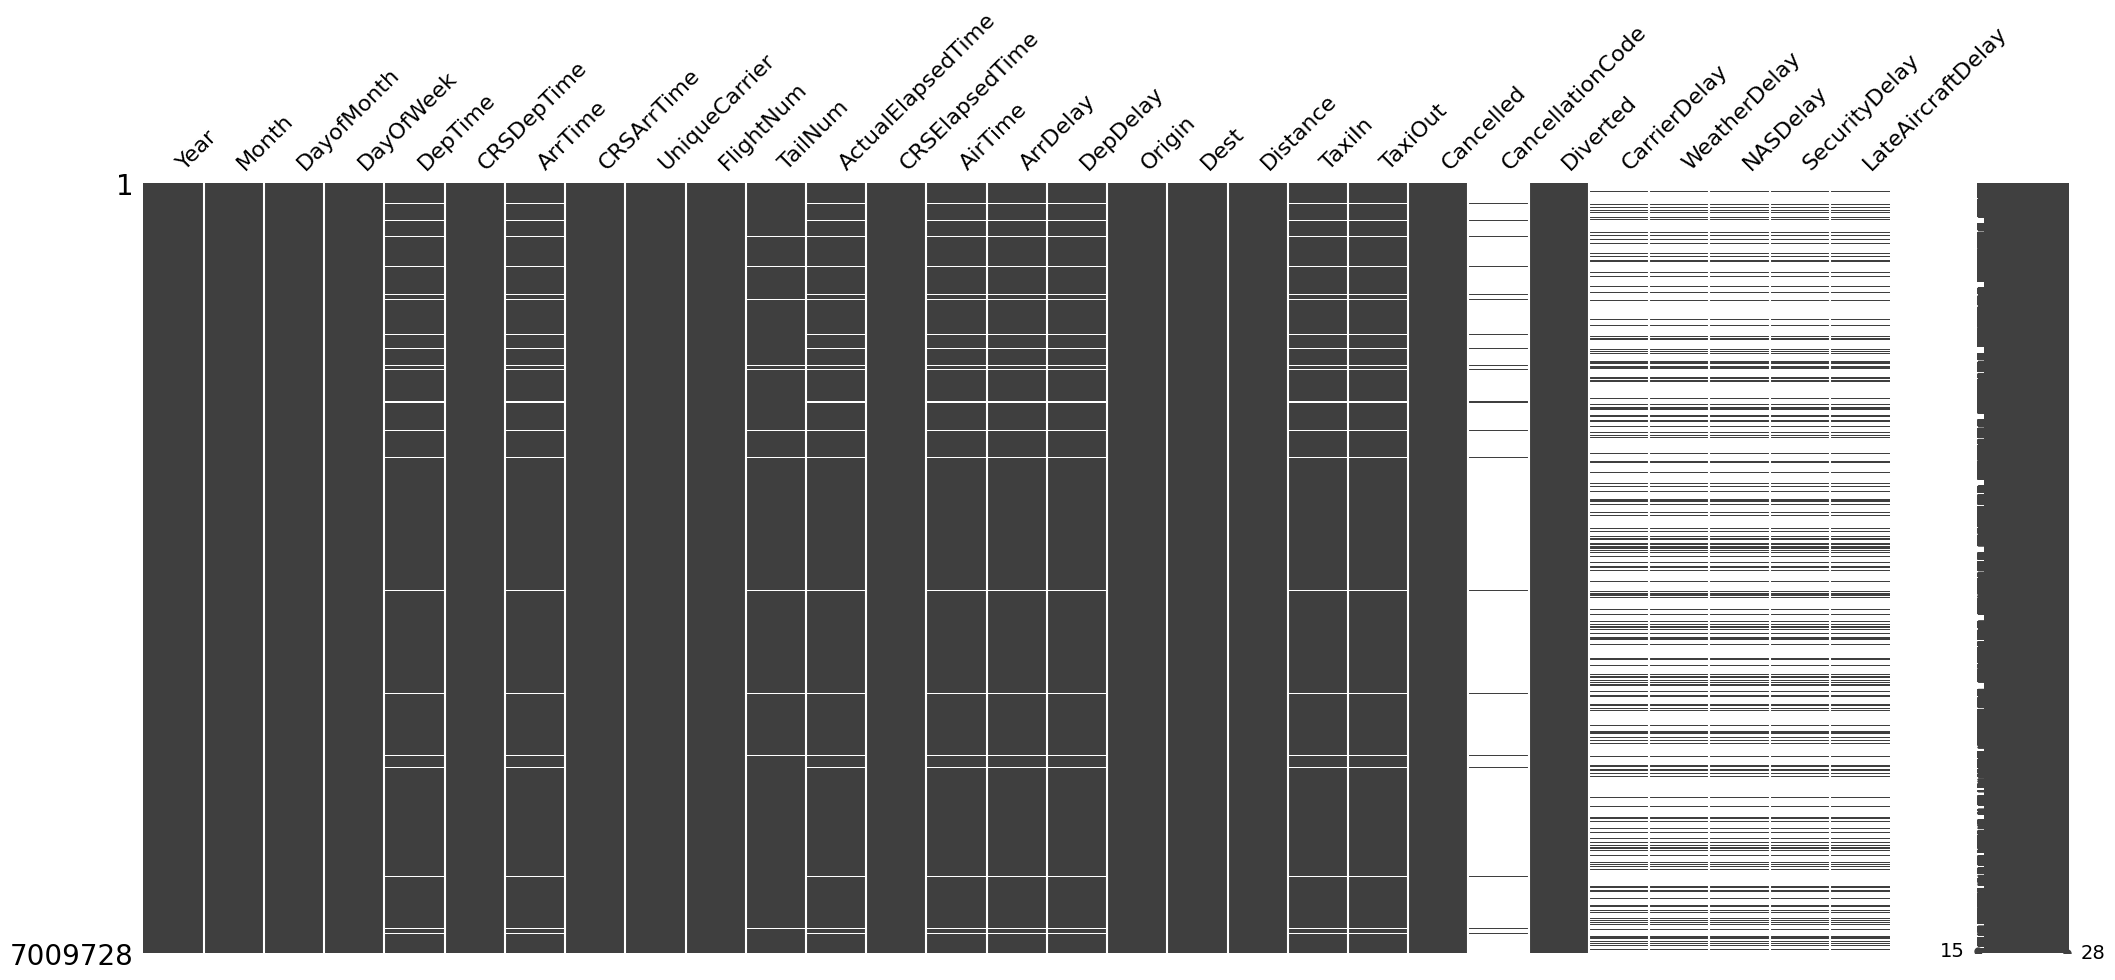

In [5]:
import missingno as msno
msno.matrix(df)

In [6]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

In [7]:
df.duplicated().sum()

4

> **3. PREPROCESAMIENTO DE DATOS**

3.1. Eliminación de Duplicados

In [8]:
df.drop_duplicates(inplace=True)

3.2. Separación de 2 grupos: "df_cat" y "df_num"

3.2.1. **Df_cat**

In [9]:
cat=["UniqueCarrier","TailNum","Origin","Dest","CancellationCode"]
df_cat=df[cat]
df_cat.columns

Index(['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode'], dtype='object')

In [10]:
df_cat.isnull().sum()

UniqueCarrier             0
TailNum               83365
Origin                    0
Dest                      0
CancellationCode    6872290
dtype: int64

In [11]:
df_cat.drop(columns=['TailNum','CancellationCode'], inplace=True)

/tmp/ipykernel_19/1900910327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop(columns=['TailNum','CancellationCode'], inplace=True)


In [12]:
df_cat.columns

Index(['UniqueCarrier', 'Origin', 'Dest'], dtype='object')

In [13]:
df_cat['UniqueCarrier'] = df_cat['UniqueCarrier'].factorize()[0] + 1

/tmp/ipykernel_19/92647884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['UniqueCarrier'] = df_cat['UniqueCarrier'].factorize()[0] + 1


In [14]:
df_cat['Origin'] = df_cat['Origin'].factorize()[0] + 1

/tmp/ipykernel_19/1030412614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Origin'] = df_cat['Origin'].factorize()[0] + 1


In [15]:
df_cat['Dest'] = df_cat['Dest'].factorize()[0] + 1

/tmp/ipykernel_19/2544142493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Dest'] = df_cat['Dest'].factorize()[0] + 1


In [16]:
df_cat.columns

Index(['UniqueCarrier', 'Origin', 'Dest'], dtype='object')

In [17]:
df_cat.isnull().sum()

UniqueCarrier    0
Origin           0
Dest             0
dtype: int64

In [18]:
df_cat.shape

(7009724, 3)

3.2.2. **Df_num**

In [19]:
df_num=df.drop(columns=df_cat)
df_num.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

In [20]:
type(df_num)

pandas.core.frame.DataFrame

In [21]:
df_num.drop(columns=['TailNum','CancellationCode'], inplace=True)

In [22]:
df_num.corr()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,0.001817,-0.003727,-0.010094,-0.008215,-0.000410,0.000250,0.002502,-0.014060,...,-0.004147,0.007116,-0.016092,-0.028392,0.001840,-0.000232,0.005598,0.013534,-0.003165,0.002175
DayofMonth,NaN,0.001817,1.000000,0.005650,-0.001501,-0.001449,-0.001549,-0.001443,-0.000678,0.000597,...,0.001798,-0.002876,-0.000707,-0.008432,0.000612,0.000248,0.001249,0.004113,-0.000276,0.009386
DayOfWeek,NaN,-0.003727,0.005650,1.000000,0.005576,0.005322,0.003378,0.005218,-0.001274,0.012929,...,0.017231,0.010199,-0.007137,-0.006286,0.001504,0.012319,0.006441,-0.007274,0.004513,0.012024
DepTime,NaN,-0.010094,-0.001501,0.005576,1.000000,0.968457,0.712649,0.791164,-0.006080,-0.017069,...,-0.016545,-0.042257,0.050687,0.002028,0.001746,0.001787,0.023042,-0.013342,-0.009065,0.205080
CRSDepTime,NaN,-0.008215,-0.001449,0.005322,0.968457,1.000000,0.696878,0.791819,-0.010678,-0.017184,...,-0.013143,-0.047567,0.039814,0.016218,-0.000810,-0.053916,0.006909,-0.052253,-0.011447,0.191594
ArrTime,NaN,-0.000410,-0.001549,0.003378,0.712649,0.696878,1.000000,0.861972,-0.017660,0.037625,...,0.028980,0.007112,0.049434,NaN,-0.000683,-0.058128,-0.020296,0.019385,-0.005345,-0.009714
CRSArrTime,NaN,0.000250,-0.001443,0.005218,0.791164,0.791819,0.861972,1.000000,-0.027878,0.051469,...,0.045825,-0.006542,0.059925,0.013236,0.007386,-0.053370,0.007568,-0.010597,-0.009237,0.153407
FlightNum,NaN,0.002502,-0.000678,-0.001274,-0.006080,-0.010678,-0.017660,-0.027878,1.000000,-0.319347,...,-0.349557,-0.009515,0.016561,0.042066,-0.000065,0.057192,0.064391,0.004423,-0.001206,-0.034556
ActualElapsedTime,NaN,-0.014060,0.000597,0.012929,-0.017069,-0.017184,0.037625,0.051469,-0.319347,1.000000,...,0.964521,0.158444,0.267801,NaN,NaN,-0.032919,-0.013712,0.203806,0.000318,-0.087003


In [23]:
df_num=df_num.drop(columns=["Year","Month","Cancelled","Diverted"])
df_num.columns

Index(['DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

In [24]:
df_num.isnull().sum()

DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
FlightNum                  0
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Distance                   0
TaxiIn                151649
TaxiOut               137058
CarrierDelay         5484991
WeatherDelay         5484991
NASDelay             5484991
SecurityDelay        5484991
LateAircraftDelay    5484991
dtype: int64

In [25]:
df_num.describe()

,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7.009724e+06,7.009724e+06,6.873478e+06,7.009724e+06,6.858075e+06,7.009724e+06,7.009724e+06,6.855025e+06,7.008880e+06,6.855025e+06,6.855025e+06,6.873478e+06,7.009724e+06,6.858075e+06,6.872666e+06,1.524733e+06,1.524733e+06,1.524733e+06,1.524733e+06,1.524733e+06
mean,1.572801e+01,3.924181e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224201e+03,1.273224e+02,1.288668e+02,1.040186e+02,8.168445e+00,9.972565e+00,7.263868e+02,6.860851e+00,1.645305e+01,1.577205e+01,3.039035e+00,1.716462e+01,7.497444e-02,2.077101e+01
std,8.797066e+00,1.988260e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,6.940974e+01,6.743979e+01,3.850194e+01,3.531127e+01,5.621018e+02,4.933651e+00,1.133280e+01,4.009913e+01,1.950289e+01,3.189497e+01,1.837941e+00,3.925965e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,8.000000e+01,5.500000e+01,-1.000000e+01,-4.000000e+00,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,1.100000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,9.540000e+02,8.000000e+00,1.900000e+01,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,1.435000e+03,1.350000e+03,2.461000e+03,2.467000e+03,4.962000e+03,3.080000e+02,4.290000e+02,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


3.2.2.1. Imputacion de valores faltantes de "df_num"

In [26]:
df_num['DepDelay'].fillna(df_num['DepDelay'].interpolate(), inplace=True)
df_num['ArrDelay'].fillna(df_num['ArrDelay'].interpolate(), inplace=True)
df_num['DepTime'].fillna(df_num['DepTime'].interpolate(), inplace=True)
df_num['ArrTime'].fillna(df_num['ArrTime'].interpolate(), inplace=True)
df_num['AirTime'].fillna(df_num['AirTime'].interpolate(), inplace=True)

In [27]:
df_num.isnull().sum()

DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
FlightNum                  0
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime                    0
ArrDelay                   0
DepDelay                   0
Distance                   0
TaxiIn                151649
TaxiOut               137058
CarrierDelay         5484991
WeatherDelay         5484991
NASDelay             5484991
SecurityDelay        5484991
LateAircraftDelay    5484991
dtype: int64

In [28]:
df_num['ActualElapsedTime'].fillna(df_num['ActualElapsedTime'].interpolate(), inplace=True)
df_num['CRSElapsedTime'].fillna(df_num['CRSElapsedTime'].interpolate(), inplace=True)
df_num['TaxiIn'].fillna(df_num['TaxiIn'].interpolate(), inplace=True)
df_num['TaxiOut'].fillna(df_num['TaxiOut'].interpolate(), inplace=True)

In [29]:
df_num.isnull().sum()

DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
FlightNum                  0
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Distance                   0
TaxiIn                     0
TaxiOut                    0
CarrierDelay         5484991
WeatherDelay         5484991
NASDelay             5484991
SecurityDelay        5484991
LateAircraftDelay    5484991
dtype: int64

In [30]:
df_num.drop(columns=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], inplace=True)

In [31]:
df_num.isnull().sum()

DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
dtype: int64

In [32]:
df_num.shape

(7009724, 15)

In [33]:
df_num.describe()

,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
count,7.009724e+06,7.009724e+06,7.009724e+06,7.009724e+06,7.009724e+06,7.009724e+06,7.009724e+06,7.009724e+06,7.009724e+06,7.009724e+06,7.009724e+06,7.009724e+06,7.009724e+06,7.009724e+06,7.009724e+06
mean,1.572801e+01,3.924181e+00,1.334325e+03,1.326086e+03,1.481415e+03,1.494801e+03,2.224201e+03,1.272139e+02,1.288652e+02,1.038339e+02,8.522864e+00,1.022618e+01,7.263868e+02,6.874972e+00,1.651236e+01
std,8.797066e+00,1.988260e+00,4.768526e+02,4.642509e+02,5.037229e+02,4.826728e+02,1.961716e+03,6.996334e+01,6.940690e+01,6.722052e+01,3.875598e+01,3.550105e+01,5.621018e+02,4.936454e+00,1.137081e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,1.100000e+01,0.000000e+00,0.000000e+00
25%,8.000000e+00,2.000000e+00,9.290000e+02,9.250000e+02,1.108000e+03,1.115000e+03,6.220000e+02,7.700000e+01,8.000000e+01,5.550000e+01,-1.000000e+01,-4.000000e+00,3.250000e+02,4.000000e+00,1.000000e+01
50%,1.600000e+01,4.000000e+00,1.326000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,1.100000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,5.810000e+02,6.000000e+00,1.400000e+01
75%,2.300000e+01,6.000000e+00,1.727000e+03,1.715000e+03,1.907000e+03,1.907000e+03,3.518000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,9.540000e+02,8.000000e+00,1.900000e+01
max,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,1.435000e+03,1.350000e+03,2.461000e+03,2.467000e+03,4.962000e+03,3.080000e+02,4.290000e+02


3.2.2.2. Detección de valores atípicos en "df_num"

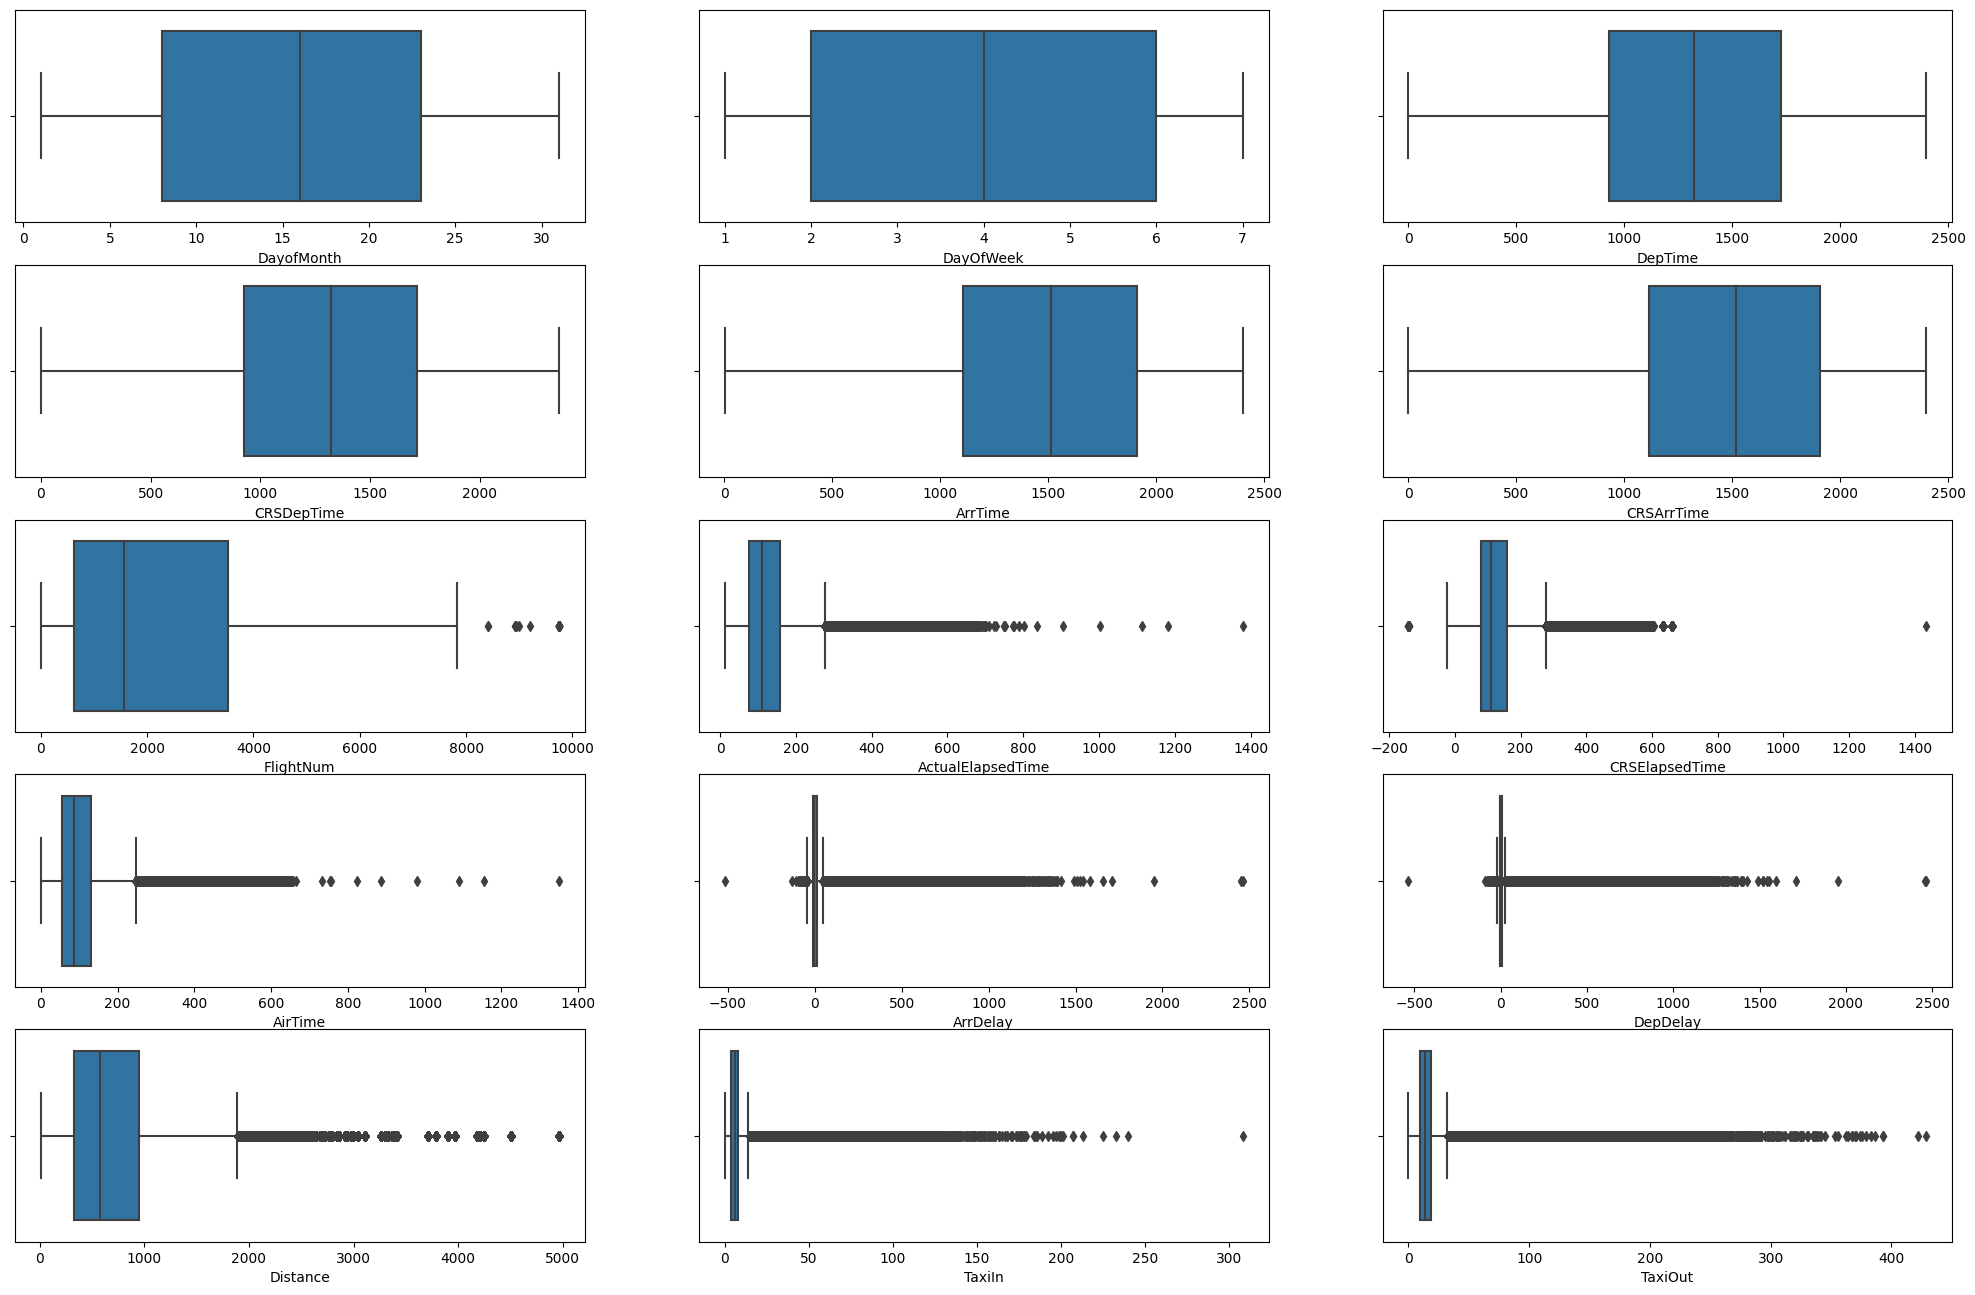

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(5, 3, figsize=(25,16))

for i, col in enumerate(df_num.columns):
    sns.boxplot(x=df[col], ax=ax[i//3, i%3])

plt.show()

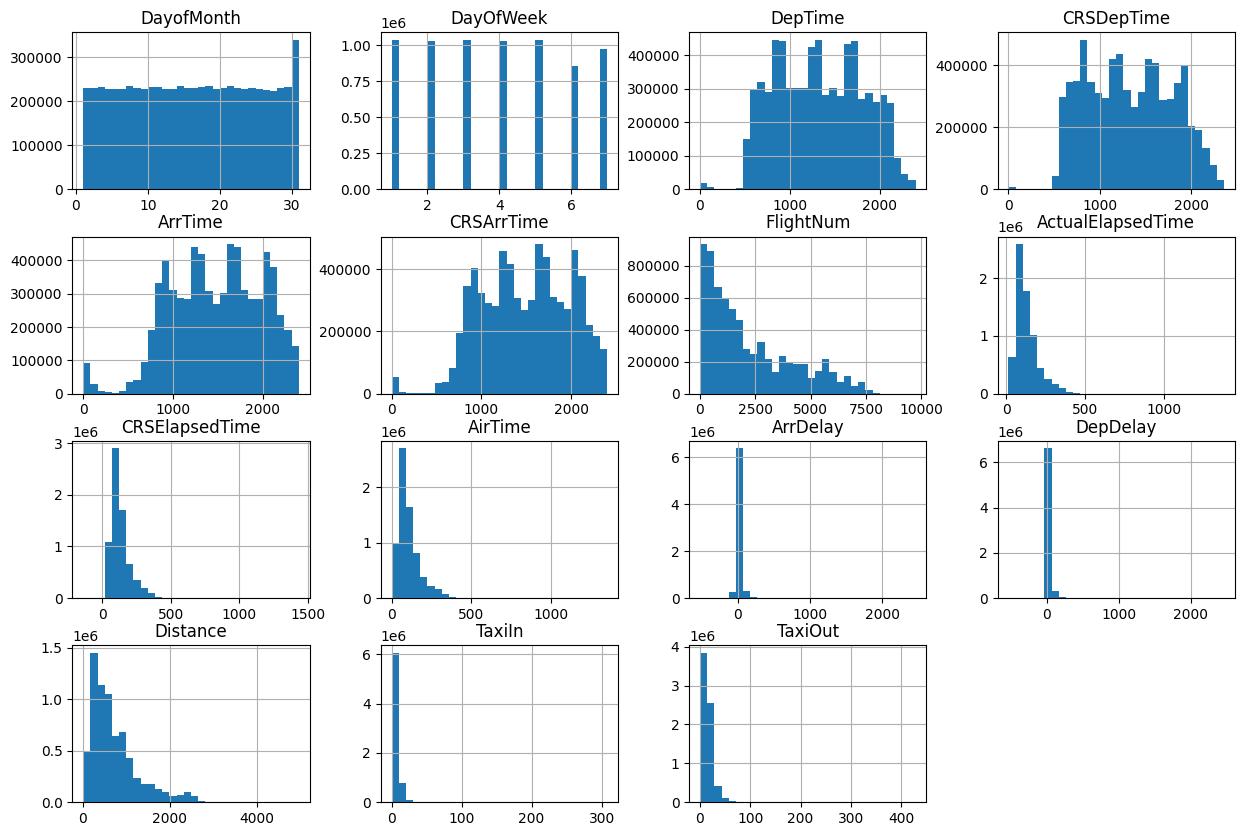

In [35]:
df_num.hist(bins=30, figsize=(15, 10))
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num_scal = scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scal, columns = df_num.columns)

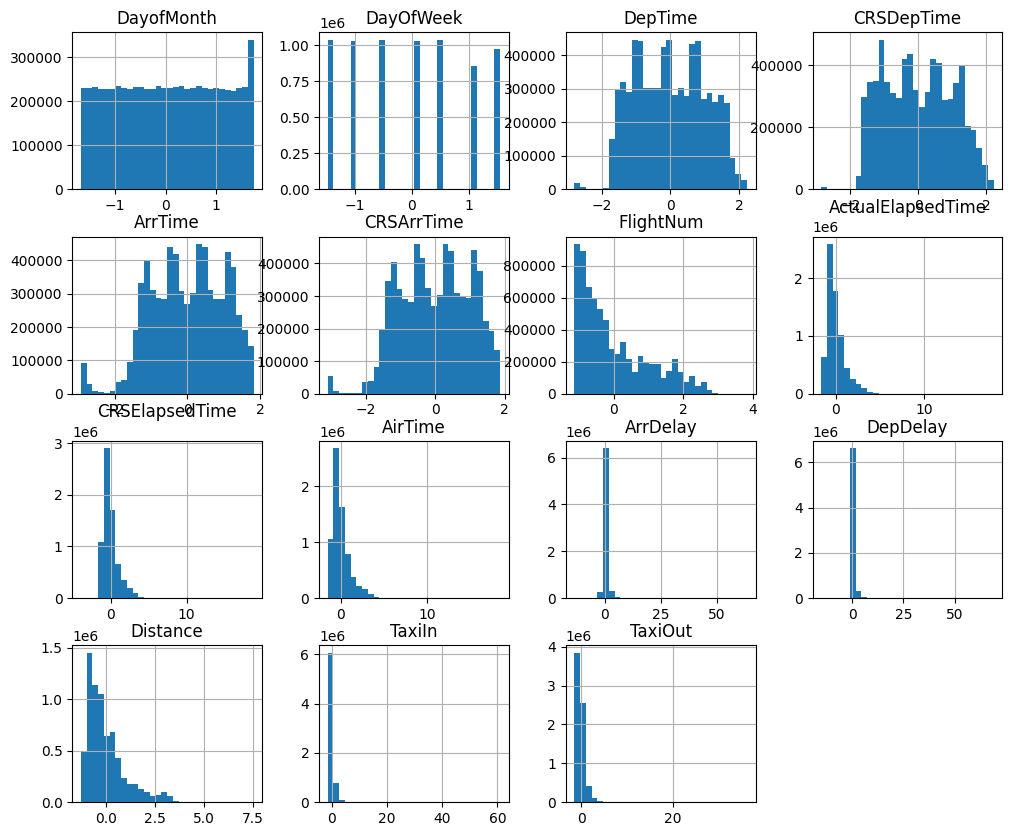

In [37]:
df_num_scaled.hist(bins=30, figsize=(12, 10))
plt.show()

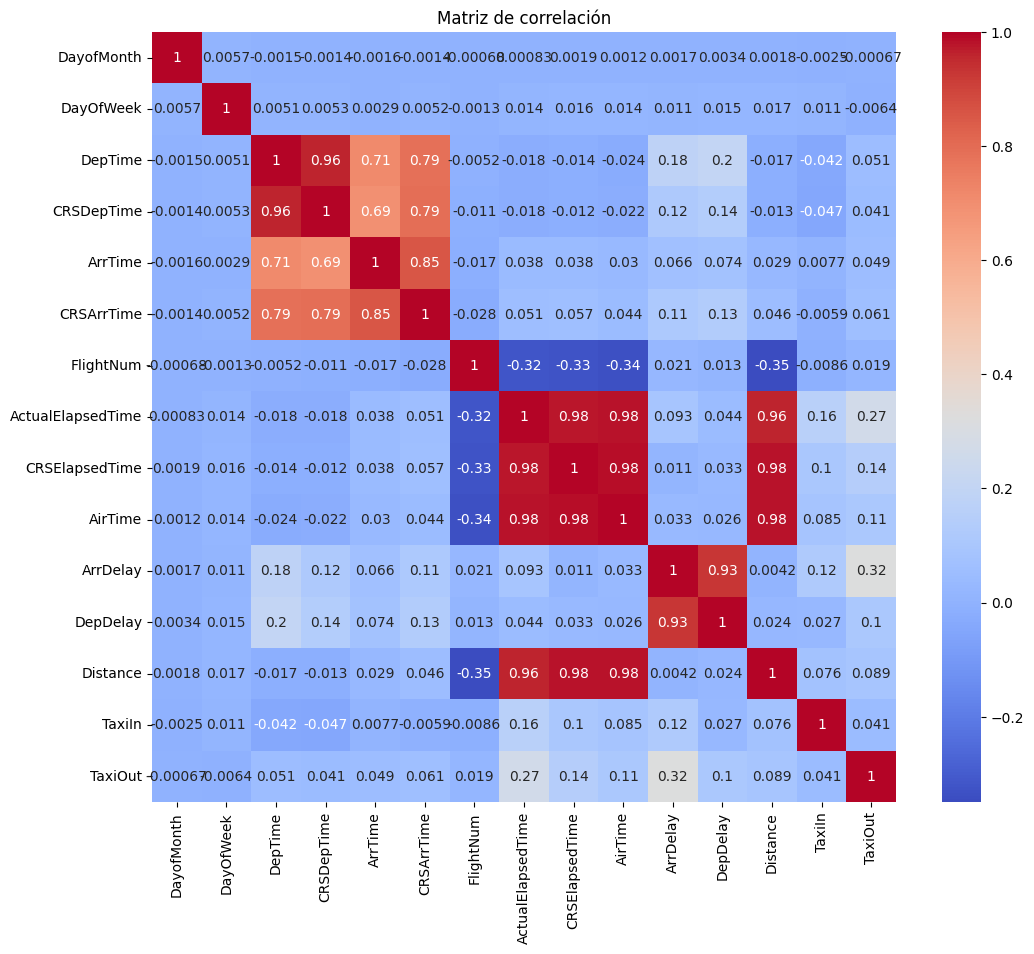

In [38]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_num_scaled.corr(), cmap="coolwarm", annot=True)
plt.title("Matriz de correlación")
plt.show()

In [39]:
df_num_scaled.drop(columns=['CRSDepTime','CRSArrTime','CRSElapsedTime'], inplace=True)

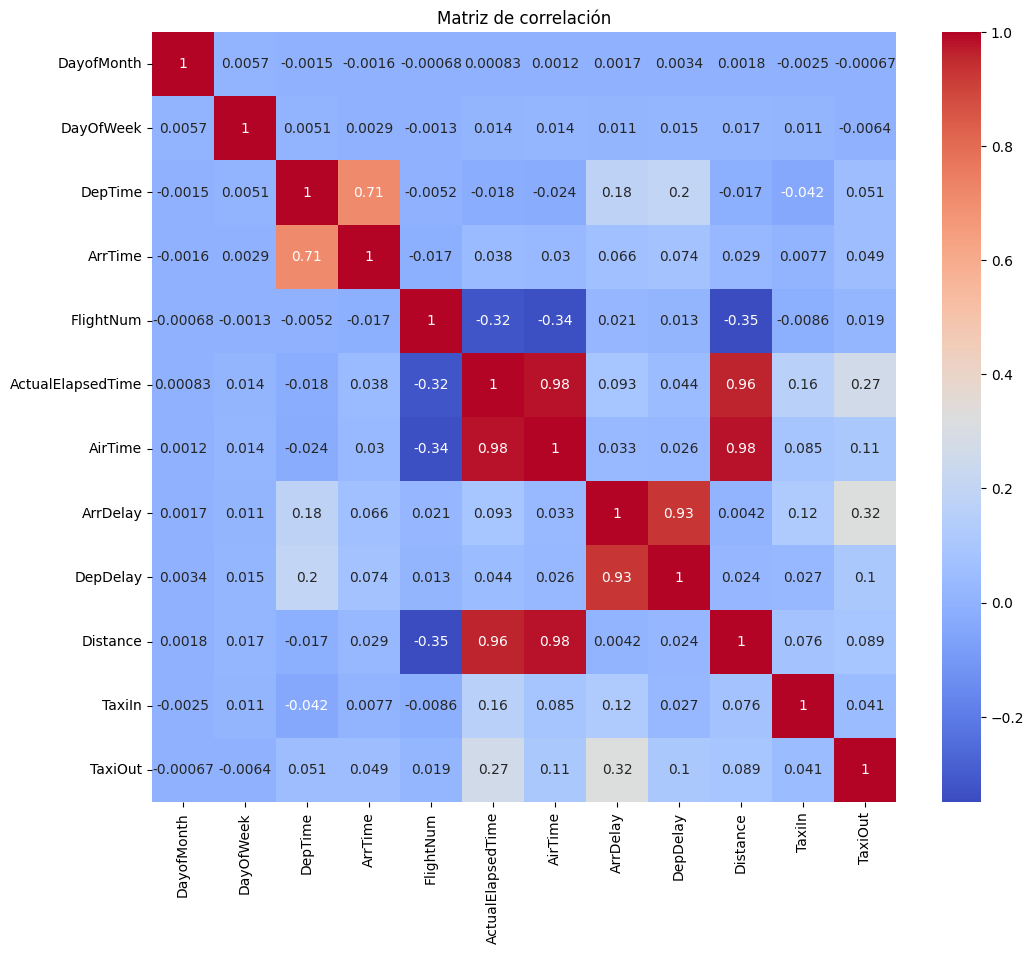

In [40]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_num_scaled.corr(), cmap="coolwarm", annot=True)
plt.title("Matriz de correlación")
plt.show()

In [41]:
data_final=pd.concat([df_num_scaled,df_cat],axis=1)
data_final.head(10)

,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,UniqueCarrier,Origin,Dest
0,-1.446847,0.038133,1.402267,1.448385,-0.963035,0.011236,0.180989,-0.581146,-0.062708,0.148751,-0.582396,-0.748615,1.0,1.0,1.0
1,-1.446847,0.038133,-1.216991,-0.951744,0.513224,0.011236,0.136359,-0.168306,0.247143,0.148751,-0.379822,-0.572726,1.0,1.0,1.0
2,-1.446847,0.038133,-1.481224,-1.344817,-0.905432,-0.446147,-0.414068,0.141324,-0.062708,-0.376065,-0.784971,0.042885,1.0,2.0,2.0
3,-1.446847,0.038133,-0.856293,-0.848512,-0.243767,-0.560492,-0.384315,-0.374726,-0.400726,-0.376065,-0.784971,-0.836560,1.0,2.0,2.0
4,-1.446847,0.038133,1.037374,0.948110,0.864447,-0.531906,-0.399191,0.657373,0.669665,-0.376065,-0.784971,-0.572726,1.0,2.0,2.0
5,-1.446847,0.038133,1.270150,1.269716,-0.941115,-0.374681,-0.250427,0.063916,0.416152,-0.068292,-0.582396,-0.572726,1.0,2.0,3.0
6,-1.446847,0.038133,1.263859,1.102957,-0.874337,1.612074,1.876899,1.250830,1.599215,1.538179,-0.784971,-0.836560,1.0,2.0,4.0
7,-1.446847,0.038133,-0.619322,-0.693665,-0.861083,1.512022,1.713259,-0.684355,-0.316221,1.538179,0.025328,-0.836560,1.0,2.0,4.0
8,-1.446847,0.038133,-1.504292,-1.646570,-1.128196,-0.460440,-0.503326,-0.168306,-0.231717,-0.489923,-0.177247,0.218774,1.0,2.0,5.0
9,-1.446847,0.038133,0.599084,0.312840,-0.720900,-0.689131,-0.503326,-0.632750,-0.288053,-0.489923,-0.784971,-0.924504,1.0,2.0,5.0


In [42]:
data_final.isna().sum()

DayofMonth           4
DayOfWeek            4
DepTime              4
ArrTime              4
FlightNum            4
ActualElapsedTime    4
AirTime              4
ArrDelay             4
DepDelay             4
Distance             4
TaxiIn               4
TaxiOut              4
UniqueCarrier        4
Origin               4
Dest                 4
dtype: int64

In [43]:
data_final.dropna(inplace=True)

In [44]:
X = data_final.drop('DepDelay', axis=1)
y = data_final['DepDelay']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred_regre = modelo_regresion.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred_regre))
print("MAE: ", mean_absolute_error(y_test, y_pred_regre))
print("R2: ", r2_score(y_test, y_pred_regre))

MSE:  0.0734771321564598
MAE:  0.18493309015535173
R2:  0.9261663976734753


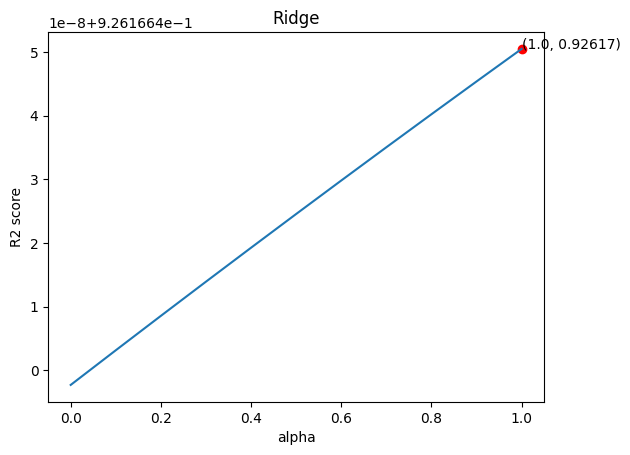

In [48]:
import numpy as np

r2s = []
for i in np.arange(0.0, 1.1, 0.1):
    modelo_ridge = Ridge(alpha=i)
    modelo_ridge.fit(X_train, y_train)
    y_pred_ridge = modelo_ridge.predict(X_test)
    r2s.append(r2_score(y_test, y_pred_ridge))
    
x = np.arange(0.0, 1.1, 0.1)
y_max = np.max(r2s)
x_max = x[np.argmax(r2s)]

plt.plot(x, r2s)
plt.scatter(x_max, y_max, color='red')
plt.annotate(f'({x_max:.1f}, {y_max:.5f})', (x_max, y_max))
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.title("Ridge")
plt.show()